2.0


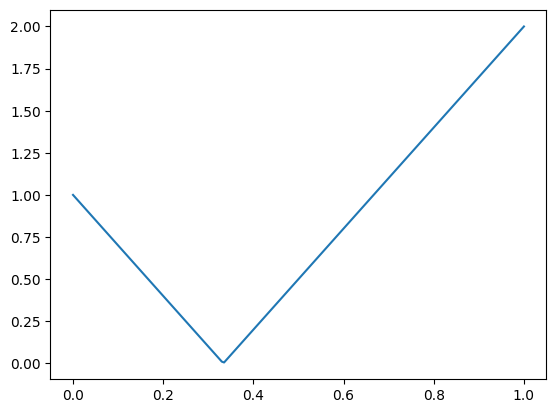

In [29]:
import numpy as np
from numpy import sin, cos, sqrt
import matplotlib.pyplot as plt

def func(p):
    theta = np.pi/2
    phi = 0
    # return 2*sin(theta/2)*cos(theta/2)*sqrt(4*(p**2)*(cos(phi)**2)-4*p*(cos(phi)**2)+1) # bf
    # return 2*(1-p)*np.sin(theta/2)*np.cos(theta/2)
    # return np.sqrt(5)*((3*p-1)/6) #'hw'
    # return 2*np.sqrt(1-p)*np.sin(theta/2)*np.cos(theta/2)
    # return (1-p)*np.sin(theta/2)*np.cos(theta/2)*np.sqrt(np.cos(phi)-np.sin(phi))
    # return (1-p)*np.sin(np.pi/2)*np.cos(0/2) #'D'
    # return np.sqrt(1-p)*np.sin(np.pi/2)*np.cos(0/2) #'l'
    p0 = p
    p1 = (1-p)/2
    p2 = (1-p)/2
    return (2)*(sqrt((p0**2)+(p1**2)+(p2**2)-(p0*p1)-(p0*p2)-(p1*p2)))
x = np.linspace(0,1,201)
y = func(x);print(max(y));plt.plot(x,y);plt.show()

In [8]:
from sympy import cos, sin, sqrt, pi, Matrix, Symbol, exp, print_latex, simplify

p0 = Symbol('p_0')
psi_0 = [p0/3,p0/3,p0/3,0]
print(psi_0)


[p_0/3, p_0/3, p_0/3, 0]


In [1]:
import sympy as sp

p0 = sp.symbols('p_0')
i = sp.I
sqrt3 = sp.sqrt(3)

K0 = sp.sqrt(p0) * (sp.Matrix([[1, 0, 0, 0], [0, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 0]]) + \
                    sp.Matrix([[0, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 0], [0, 0, 0, 1]]))
print("K_0 = ", sp.latex(K0))

K1 = sp.sqrt((1-p0)/2) * (sp.Matrix([[1, 0, 0, 0], [0, (i*sqrt3-1)/2, 0, 0], [0, 0, (-(i*sqrt3)-1)/2, 0], [0, 0, 0, 0]]) + \
                          sp.Matrix([[0, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 0], [0, 0, 0, 1]]))
print("K_1 = ", sp.latex(K1))

K2 = sp.sqrt((1-p0)/2) * (sp.Matrix([[1, 0, 0, 0], [0, (-(i*sqrt3)-1)/2, 0, 0], [0, 0, (i*sqrt3-1)/2, 0], [0, 0, 0, 0]]) + \
                          sp.Matrix([[0, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 0], [0, 0, 0, 1]]))
print("K_2 = ", sp.latex(K2))


K_0 =  \left[\begin{matrix}\sqrt{p_{0}} & 0 & 0 & 0\\0 & \sqrt{p_{0}} & 0 & 0\\0 & 0 & \sqrt{p_{0}} & 0\\0 & 0 & 0 & \sqrt{p_{0}}\end{matrix}\right]
K_1 =  \left[\begin{matrix}\sqrt{\frac{1}{2} - \frac{p_{0}}{2}} & 0 & 0 & 0\\0 & \sqrt{\frac{1}{2} - \frac{p_{0}}{2}} \cdot \left(\frac{1}{2} + \frac{\sqrt{3} i}{2}\right) & 0 & 0\\0 & 0 & \left(- \frac{1}{2} - \frac{\sqrt{3} i}{2}\right) \sqrt{\frac{1}{2} - \frac{p_{0}}{2}} & 0\\0 & 0 & 0 & \sqrt{\frac{1}{2} - \frac{p_{0}}{2}}\end{matrix}\right]
K_2 =  \left[\begin{matrix}\sqrt{\frac{1}{2} - \frac{p_{0}}{2}} & 0 & 0 & 0\\0 & \sqrt{\frac{1}{2} - \frac{p_{0}}{2}} \cdot \left(\frac{1}{2} - \frac{\sqrt{3} i}{2}\right) & 0 & 0\\0 & 0 & \left(- \frac{1}{2} + \frac{\sqrt{3} i}{2}\right) \sqrt{\frac{1}{2} - \frac{p_{0}}{2}} & 0\\0 & 0 & 0 & \sqrt{\frac{1}{2} - \frac{p_{0}}{2}}\end{matrix}\right]


In [ ]:
\begin{align}
K_j\begin{cases}
K_{0}=&\sqrt{p_{0}}\left(|00\rangle\langle00|+|01\rangle\langle01|+|10\rangle\langle10|\right)\\ \nonumber \\ \\ 
K_{1}=&\sqrt{\frac{1-p_0}{2}}\left(|00\rangle\langle00|+V|01\rangle\langle01|+V*|10\rangle\langle10|\right)\\ \nonumber \\
K_{2}=&\sqrt{\frac{1-p_0}{2}}\left(|00\rangle\langle00|+V*|01\rangle\langle01|+V|10\rangle\langle10|\right),
\end{cases}
\end{align}

(20, 20)
(20, 20)
(20, 20)


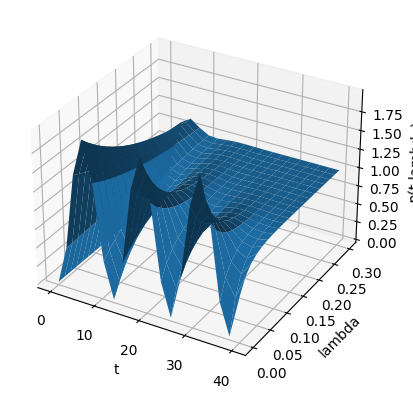

In [ ]:
from src.simulation_with_save import *
from numpy import cos, sin, exp, linspace, meshgrid, array, zeros, shape

def non_markov_t(lamb,t):
    result = 1 - exp(-lamb*t)*(cos(t/2)+lamb*sin(t/2))
    return result
def get_t_noMarkov2(lamb, t):
    #lamb = 5
    #gamma_0 = 2.8
    t_noMarkov = []
    for p in t:
        t_noMarkov.append(non_markov_t(lamb,p))
    return t_noMarkov

size = 20
t = linspace(0,40,size)
lamb_list = linspace(0,0.3,size)
z = zeros((size,size))
#z = non_markov_t(lamb_list, t)
j = 0
k = 0
for p in t:
    for lamb in lamb_list:
        z[j,k] = non_markov_t(lamb,p)
        j+=1
    k+=1
    j=0
#        z.append(non_markov_t(lamb,p))
#z = array(z)
t, lamb_list = meshgrid(t,lamb_list)
    
print(shape(t))
print(shape(lamb_list))
print(shape(z))

import matplotlib.pyplot as plt
import pylab
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
#ax = fig.gca(projection='3d')
ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(t, lamb_list,z)
ax.set_xlabel('t')
ax.set_ylabel('lambda')
ax.set_zlabel('p(t,lambda)')
plt.show()

(20, 20)
(20, 20)
(20, 20)


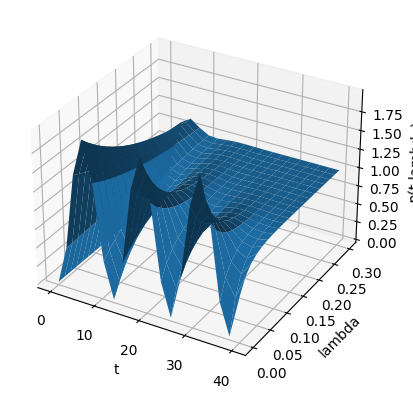

In [10]:
from src.simulation_with_save import *
from numpy import cos, sin, exp, linspace, meshgrid, array, zeros, shape
def non_markov_t(lamb,t):
    result = 1 - exp(-lamb*t)*(cos(t/2)+lamb*sin(t/2))
    return result
def get_t_noMarkov2(lamb, t):
    #lamb = 5
    #gamma_0 = 2.8
    t_noMarkov = []
    for p in t:
        t_noMarkov.append(non_markov_t(lamb,p))
    return t_noMarkov
size = 20

t = linspace(0,40,size)
lamb_list = linspace(0,0.3,size)
z = zeros((size,size))
#z = non_markov_t(lamb_list, t)
j = 0
k = 0
for p in t:
    for lamb in lamb_list:
        z[j,k] = non_markov_t(lamb,p)
        j+=1
    k+=1
    j=0
#        z.append(non_markov_t(lamb,p))
#z = array(z)
t, lamb_list = meshgrid(t,lamb_list)
    
print(shape(t))
print(shape(lamb_list))
print(shape(z))

import matplotlib.pyplot as plt
import pylab
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
#ax = fig.gca(projection='3d')
ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(t, lamb_list,z)
ax.set_xlabel('t')
ax.set_ylabel('lambda')
ax.set_zlabel('p(t,lambda)')
plt.show()

(20, 20)
(20, 20)
(20, 20)


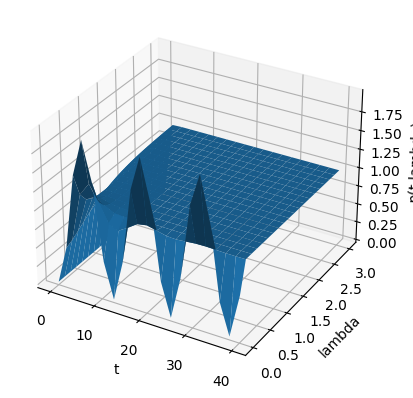

In [2]:
from src.simulation_with_save import *
from numpy import cos, sin, exp, linspace, meshgrid, array, zeros, shape
def non_markov_t(lamb,t):
    result = 1 - exp(-lamb*t)*(cos(t/2)+lamb*sin(t/2))
    return result
def get_t_noMarkov(lamb, t):
    #lamb = 5
    #gamma_0 = 2.8
    t_noMarkov = []
    for p in t:
        t_noMarkov.append(non_markov_t(lamb,p))
    return t_noMarkov
size = 20

t = linspace(0,40,size)
lamb_list = linspace(0,3,size)
z = zeros((size,size))
#z = non_markov_t(lamb_list, t)
j = 0
k = 0
for p in t:
    for lamb in lamb_list:
        z[j,k] = non_markov_t(lamb,p)
        j+=1
    k+=1
    j=0
#        z.append(non_markov_t(lamb,p))
#z = array(z)
t, lamb_list = meshgrid(t,lamb_list)
    
print(shape(t))
print(shape(lamb_list))
print(shape(z))

import matplotlib.pyplot as plt
import pylab
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
#ax = fig.gca(projection='3d')
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(t, lamb_list,z)
ax.set_xlabel('t')
ax.set_ylabel('lambda')
ax.set_zlabel('p(t,lambda)')
plt.show()


[0.   0.25 0.5  0.75 1.  ]
<class 'numpy.ndarray'>
0 de 5
{'map_name': 'pf', 'params': tensor([ 0.2084,  1.2473,  0.2059,  2.2423,  3.0810, -1.8959,  1.1108,  1.2270,
        -1.2451, -0.0759,  0.6720, -0.1687,  0.5984,  0.5046,  0.0852, -0.5527,
         0.1425, -1.0556, -0.7918, -1.6825, -2.6111,  0.0410, -0.7395,  1.1296],
       dtype=torch.float64, requires_grad=True), 'epochs': 1, 'theta': 1.5707963267948966, 'phi': 0, 'p': 0.0}
1 de 5
{'map_name': 'pf', 'params': tensor([ 0.2084,  1.2473,  0.2059,  2.2423,  3.0810, -1.8959,  1.1108,  1.2270,
        -1.2451, -0.0759,  0.6720, -0.1687,  0.5984,  0.5046,  0.0852, -0.5527,
         0.1425, -1.0556, -0.7918, -1.6825, -2.6111,  0.0410, -0.7395,  1.1296],
       dtype=torch.float64, requires_grad=True), 'epochs': 1, 'theta': 1.5707963267948966, 'phi': 0, 'p': 0.25}
2 de 5
{'map_name': 'pf', 'params': tensor([ 0.2084,  1.2473,  0.2059,  2.2423,  3.0810, -1.8959,  1.1108,  1.2270,
        -1.2451, -0.0759,  0.6720, -0.1687,  0.5984,  0.

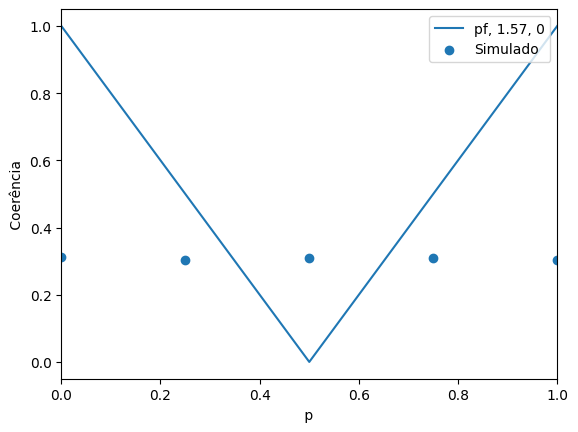

In [22]:
import sys as s
from src.simulation_with_save import *
from numpy import cos, sin, sqrt, pi, exp
def non_markov_list_p(lamb,gamma_0,t):
    d = sqrt(2*gamma_0*lamb-lamb**2)
    result = exp(-lamb*t)*(cos(d*t/2)+(lamb/d)*sin(d*t/2))**2
    return result
def get_list_p_noMarkov(list_p):
    lamb = 0.05
    gamma_0 = 2.8
    list_p_noMarkov = []
    for p in list_p:
        list_p_noMarkov.append(non_markov_list_p(lamb,gamma_0,p))
    return list_p_noMarkov


#space = np.linspace(0, 2*pi, )
n_qubits = 2
list_p = np.linspace(0,1,5)
#pj = 
#list_p = get_list_p_noMarkov(list_p)
print(list_p)
print(type(list_p))
#s.exit()
epochs = 1
step_to_start = 1
rho_AB = QCH.rho_AB_pf
S = Simulate('pf', n_qubits, list_p, epochs, step_to_start, rho_AB)
S.run_calcs_noMarkov(False, pi/2, 0)
#S.run_calcs(True, pi/2, 0)

#phis = [0,pi,pi/1.5,pi/2,pi/3,pi/4,pi/5]
#S.run_sequential_bf(phis)
plt.legend(loc=1)
plt.xlim([0,1])
plt.show()

[1.0, 0.41555832403201226, 0.07339658831083151, 0.0004943017755148569, 0.0378623083732563]
<class 'list'>
0 de 5
{'map_name': 'pf', 'params': tensor([-4.0476, -2.3352,  0.4077,  0.3071,  1.0846,  0.8049, -1.5856,  1.9602,
        -0.5692, -0.2307, -0.9105, -2.4661, -2.6051, -0.6527,  0.0689,  0.7553,
         0.1091, -1.6042,  0.7257,  1.6026,  0.6397,  0.5997,  1.6498,  1.6037],
       dtype=torch.float64, requires_grad=True), 'epochs': 1, 'theta': 1.5707963267948966, 'phi': 0, 'p': 1.0}
1 de 5
{'map_name': 'pf', 'params': tensor([-3.9476, -2.4352,  0.5077,  0.4071,  1.1846,  0.7049, -1.6856,  2.0602,
        -0.4692, -0.3307, -0.8105, -2.5661, -2.5051, -0.7527, -0.0311,  0.8553,
         0.2091, -1.5042,  0.6257,  1.5026,  0.7397,  0.6997,  1.5498,  1.5037],
       dtype=torch.float64, requires_grad=True), 'epochs': 1, 'theta': 1.5707963267948966, 'phi': 0, 'p': 0.41555832403201226}
2 de 5
{'map_name': 'pf', 'params': tensor([-3.8476, -2.3352,  0.6077,  0.3071,  1.2846,  0.8049, -1.7

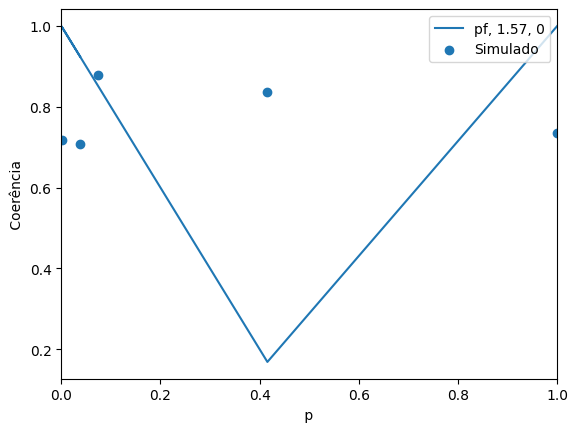

In [20]:
import sys as s
from src.simulation_with_save import *
from numpy import cos, sin, sqrt, pi, exp
def non_markov_list_p(lamb,gamma_0,t):
    d = sqrt(2*gamma_0*lamb-lamb**2)
    result = exp(-lamb*t)*(cos(d*t/2)+(lamb/d)*sin(d*t/2))**2
    return result
def get_list_p_noMarkov(list_p):
    lamb = 0.05
    gamma_0 = 2.8
    list_p_noMarkov = []
    for p in list_p:
        list_p_noMarkov.append(non_markov_list_p(lamb,gamma_0,p))
    return list_p_noMarkov


#space = np.linspace(0, 2*pi, )
n_qubits = 2
list_p = np.linspace(0,40,5)
#pj = 
list_p = get_list_p_noMarkov(list_p)
print(list_p)
print(type(list_p))
#s.exit()
epochs = 1
step_to_start = 1
rho_AB = QCH.rho_AB_pf
S = Simulate('pf', n_qubits, list_p, epochs, step_to_start, rho_AB)
S.run_calcs_noMarkov(False, pi/2, 0)
#S.run_calcs(True, pi/2, 0)

#phis = [0,pi,pi/1.5,pi/2,pi/3,pi/4,pi/5]
#S.run_sequential_bf(phis)
plt.legend(loc=1)
plt.xlim([0,1])
plt.show()

In [12]:
import sys as s
from src.simulation_with_save import *
from numpy import cos, sin, sqrt, pi, exp
def non_markov_list_p(lamb,gamma_0,t):
    d = sqrt(2*gamma_0*lamb-lamb**2)
    result = exp(-lamb*t)*(cos(d*t/2)+(lamb/d)*sin(d*t/2))**2
    return result
def get_list_p_noMarkov(list_p):
    lamb = 0.05
    gamma_0 = 2.8
    list_p_noMarkov = []
    for p in list_p:
        list_p_noMarkov.append(non_markov_list_p(lamb,gamma_0,p))
    return list_p_noMarkov


#space = np.linspace(0, 2*pi, )
n_qubits = 2
list_p = np.linspace(0,40,5)
#pj = 
list_p = get_list_p_noMarkov(list_p)
print(list_p)
print(type(list_p))
#s.exit()
epochs = 80
step_to_start = 150
rho_AB = QCH.rho_AB_pf
S = Simulate('pf', n_qubits, list_p, epochs, step_to_start, rho_AB)
S.run_calcs_noMarkov(False, pi/2, 0)
#S.run_calcs(True, pi/2, 0)

#phis = [0,pi,pi/1.5,pi/2,pi/3,pi/4,pi/5]
#S.run_sequential_bf(phis)
plt.legend(loc=1)
plt.xlim([0,1])
plt.show()

[1.0, 0.41555832403201226, 0.07339658831083151, 0.0004943017755148569, 0.0378623083732563]
<class 'list'>
0 de 5


KeyboardInterrupt: 

[1.0, 0.41555832403201226, 0.07339658831083151, 0.0004943017755148569, 0.0378623083732563]
<class 'list'>
0 de 5
{'map_name': 'ad', 'params': tensor([-2.6483, -0.7813,  1.5113, -0.0938,  1.1680, -3.5218,  0.0882, -1.1369,
        -0.2217, -0.0743,  0.2971, -0.3760,  1.0297,  0.5065, -0.4889,  0.4106,
         0.1597,  0.1684, -0.4739, -0.0834, -1.4101, -3.9634,  0.1377,  2.7302],
       dtype=torch.float64, requires_grad=True), 'epochs': 80, 'theta': 1.5707963267948966, 'phi': 0, 'p': 1.0}
1 de 5
{'map_name': 'ad', 'params': tensor([-2.3019, -0.5757,  1.9667,  0.0372,  1.2287, -3.6102, -0.0908, -1.3667,
        -0.0517, -0.1401,  0.3169, -0.2989,  1.2796,  0.8549, -0.1426,  0.1827,
         0.2916,  0.0821, -0.6171, -0.1935, -1.4724, -4.3099,  0.6726,  2.4191],
       dtype=torch.float64, requires_grad=True), 'epochs': 80, 'theta': 1.5707963267948966, 'phi': 0, 'p': 0.41555832403201226}
2 de 5
{'map_name': 'ad', 'params': tensor([-2.3541, -0.6621,  1.7170,  0.0274,  1.3172, -3.5272,  0

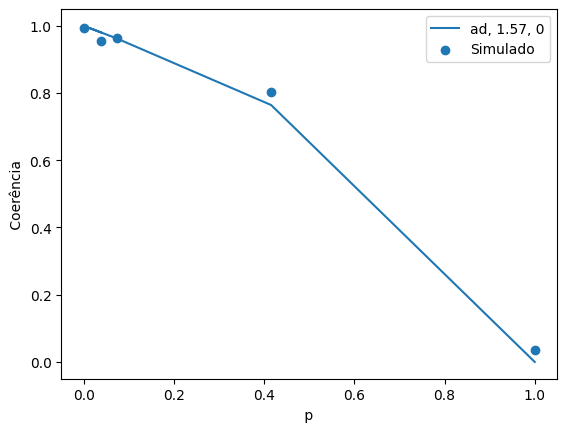

In [6]:

#space = np.linspace(0, 2*pi, )
n_qubits = 2
list_p = np.linspace(0,40,5)
#pj = 
list_p = get_list_p_noMarkov(list_p)
print(list_p)
print(type(list_p))
#s.exit()
epochs = 80
step_to_start = 45
rho_AB = QCH.rho_AB_ad
S = Simulate('ad', n_qubits, list_p, epochs, step_to_start, rho_AB)
S.run_calcs_noMarkov(False, pi/2, 0)
#S.run_calcs(True, pi/2, 0)

#phis = [0,pi,pi/1.5,pi/2,pi/3,pi/4,pi/5]
#S.run_sequential_bf(phis)
plt.legend(loc=1)
plt.show()

[1.0, 0.41555832403201226, 0.07339658831083151, 0.0004943017755148569, 0.0378623083732563]
<class 'list'>
0 de 5
{'map_name': 'bf', 'params': tensor([ 1.7740,  1.5703, -0.2753,  2.1099,  1.6637,  1.1896,  0.4225,  1.0873,
         0.7752,  0.7610,  1.7075,  0.5482, -1.8501, -0.6475,  2.9456,  0.3946,
        -0.2823,  0.6953,  0.2585,  1.5423, -2.8000,  2.0176,  1.7282, -0.6252],
       dtype=torch.float64, requires_grad=True), 'epochs': 1, 'theta': 1.5707963267948966, 'phi': 1.5707963267948966, 'p': 1.0}
1 de 5
{'map_name': 'bf', 'params': tensor([ 1.7740,  1.5703, -0.2753,  2.1099,  1.6637,  1.1896,  0.4225,  1.0873,
         0.7752,  0.7610,  1.7075,  0.5482, -1.8501, -0.6475,  2.9456,  0.3946,
        -0.2823,  0.6953,  0.2585,  1.5423, -2.8000,  2.0176,  1.7282, -0.6252],
       dtype=torch.float64, requires_grad=True), 'epochs': 1, 'theta': 1.5707963267948966, 'phi': 1.5707963267948966, 'p': 0.41555832403201226}
2 de 5
{'map_name': 'bf', 'params': tensor([ 1.7740,  1.5703, -0.275

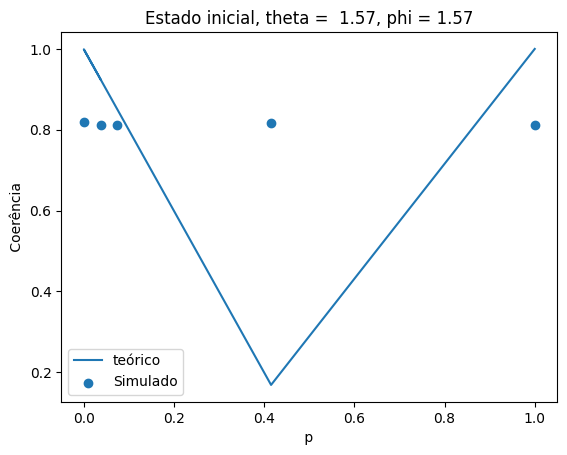

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


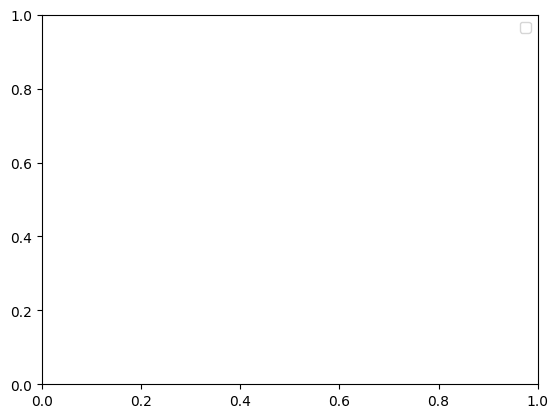

In [13]:

#space = np.linspace(0, 2*pi, )
n_qubits = 2
list_p = np.linspace(0,40,5)
#pj = 
list_p = get_list_p_noMarkov(list_p)
print(list_p)
print(type(list_p))
#s.exit()
epochs = 1
step_to_start = 1
rho_AB = QCH.rho_AB_bf
S = Simulate('bf', n_qubits, list_p, epochs, step_to_start, rho_AB)
S.run_calcs_noMarkov(False, pi/2, pi/2)
#S.run_calcs(True, pi/2, 0)

#phis = [0,pi,pi/1.5,pi/2,pi/3,pi/4,pi/5]
#S.run_sequential_bf(phis)
plt.legend(loc=1)
plt.show()

[1.0, 0.41555832403201226, 0.07339658831083151, 0.0004943017755148569, 0.0378623083732563]
<class 'list'>
0 de 5
{'map_name': 'pd', 'params': tensor([ 1.3530, -1.9033,  0.8515,  0.9511, -0.1574,  1.7807, -1.0100, -0.6852,
         1.6128, -0.0345, -0.5155,  1.3510, -1.0553,  1.3370, -0.9142, -0.4224,
         0.3074,  3.4898,  1.0248, -0.7207,  0.8796, -3.1535, -1.6224, -0.2279],
       dtype=torch.float64, requires_grad=True), 'epochs': 80, 'theta': 1.5707963267948966, 'phi': 0, 'p': 1.0}
1 de 5
{'map_name': 'pd', 'params': tensor([ 1.6069, -2.5224,  1.0332,  1.3631, -0.4821,  1.7345, -0.7372, -0.3315,
         1.7760,  0.0683, -0.5438,  1.3682, -0.7542,  1.4895, -1.1307, -1.3468,
         0.5184,  4.0210,  1.1790, -0.6275,  0.3315, -3.2107, -1.9987, -0.8673],
       dtype=torch.float64, requires_grad=True), 'epochs': 80, 'theta': 1.5707963267948966, 'phi': 0, 'p': 0.41555832403201226}
2 de 5
{'map_name': 'pd', 'params': tensor([ 1.8871, -1.6963,  0.7928,  1.2680, -0.7513,  1.4714, -0

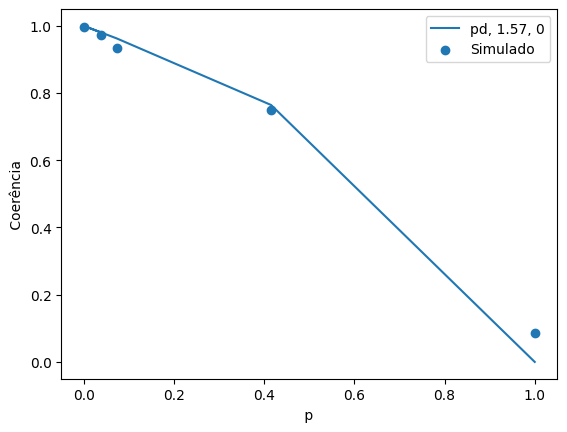

In [8]:

#space = np.linspace(0, 2*pi, )
n_qubits = 2
list_p = np.linspace(0,40,5)
#pj = 
list_p = get_list_p_noMarkov(list_p)
print(list_p)
print(type(list_p))
#s.exit()
epochs = 80
step_to_start = 45
rho_AB = QCH.rho_AB_pd
S = Simulate('pd', n_qubits, list_p, epochs, step_to_start, rho_AB)
S.run_calcs_noMarkov(False, pi/2, 0)
#S.run_calcs(True, pi/2, 0)

#phis = [0,pi,pi/1.5,pi/2,pi/3,pi/4,pi/5]
#S.run_sequential_bf(phis)
plt.legend(loc=1)
plt.show()

[1.0, 0.41555832403201226, 0.07339658831083151, 0.0004943017755148569, 0.0378623083732563]
<class 'list'>
0 de 5
{'map_name': 'adg', 'params': tensor([-1.7230,  0.6889,  1.4909, -0.3723,  0.4574, -0.7481,  0.2018, -0.3235,
         0.1345,  1.3655, -1.4793,  0.1701, -2.6416,  0.4851, -1.8616,  2.1742,
         0.0590,  1.0952,  2.4025, -1.5694,  2.1377, -0.3229, -1.4931,  2.4449,
         1.0923, -0.3023, -1.9301, -0.5266, -0.5554,  1.6494,  0.7111,  3.4408,
         1.6458,  2.6011, -0.0877,  0.2682,  0.9912,  0.8373, -0.0620, -0.2998,
        -0.9167,  0.4086, -0.8956,  0.2947, -0.5794], dtype=torch.float64,
       requires_grad=True), 'epochs': 80, 'theta': 1.5707963267948966, 'phi': 0, 'p': 1.0}
1 de 5
{'map_name': 'adg', 'params': tensor([-1.9631,  0.5648,  1.6555, -0.7459,  1.1161, -0.8429,  0.1183,  0.3998,
        -0.1696,  1.3727, -1.7455,  0.1185, -2.8072,  0.9720, -1.7877,  2.0590,
        -0.0101,  1.6491,  2.2814, -1.0492,  2.0516, -0.2290, -0.6066,  2.6492,
         0.491

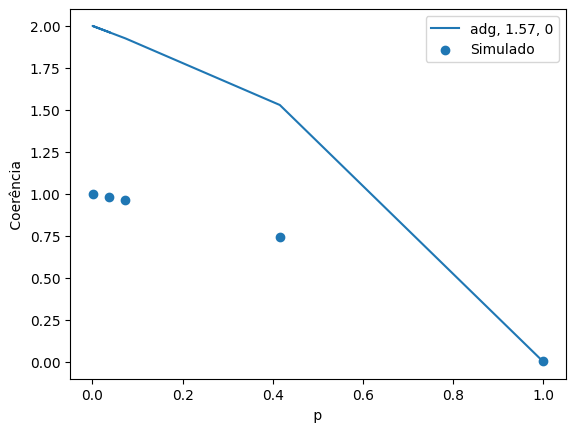

In [9]:

#space = np.linspace(0, 2*pi, )
n_qubits = 3
list_p = np.linspace(0,40,5)
#pj = 
list_p = get_list_p_noMarkov(list_p)
print(list_p)
print(type(list_p))
#s.exit()
epochs = 80
step_to_start = 45
rho_AB = QCH.rho_AB_adg
S = Simulate('adg', n_qubits, list_p, epochs, step_to_start, rho_AB)
S.run_calcs_noMarkov(False, pi/2, 0)
#S.run_calcs(True, pi/2, 0)

#phis = [0,pi,pi/1.5,pi/2,pi/3,pi/4,pi/5]
#S.run_sequential_bf(phis)
plt.legend(loc=1)
plt.show()

[1.0, 0.41555832403201226, 0.07339658831083151, 0.0004943017755148569, 0.0378623083732563]
<class 'list'>
0 de 5
{'map_name': 'bpf', 'params': tensor([ 1.5030, -2.1850,  2.6200, -0.5093, -3.7111,  0.3709, -1.9121, -0.8983,
        -4.9185, -0.9001, -1.4005,  0.5588, -0.1814,  0.4047, -1.8367,  0.0690,
         1.5324,  1.6795, -0.3712,  3.0519,  0.6554, -1.5860,  1.2657, -0.7950],
       dtype=torch.float64, requires_grad=True), 'epochs': 80, 'theta': 1.5707963267948966, 'phi': 0, 'p': 1.0}
1 de 5
{'map_name': 'bpf', 'params': tensor([ 2.1084, -2.9975,  3.0902, -0.1540, -4.7601, -0.3840, -1.6852, -0.5074,
        -5.2048, -0.6712, -0.7179,  0.2053,  0.1269,  1.3289, -2.1254,  0.4176,
         1.2556,  1.3909, -0.4796,  3.2186,  0.8606, -1.8297,  1.3285, -0.9117],
       dtype=torch.float64, requires_grad=True), 'epochs': 80, 'theta': 1.5707963267948966, 'phi': 0, 'p': 0.41555832403201226}
2 de 5
{'map_name': 'bpf', 'params': tensor([ 2.3988, -2.7978,  3.2597, -0.2845, -5.0404, -0.2307,

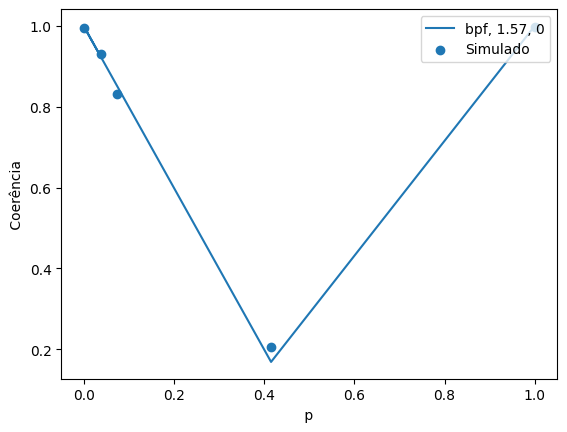

In [10]:

#space = np.linspace(0, 2*pi, )
n_qubits = 2
list_p = np.linspace(0,40,5)
#pj = 
list_p = get_list_p_noMarkov(list_p)
print(list_p)
print(type(list_p))
#s.exit()
epochs = 80
step_to_start = 45
rho_AB = QCH.rho_AB_bpf
S = Simulate('bpf', n_qubits, list_p, epochs, step_to_start, rho_AB)
S.run_calcs_noMarkov(False, pi/2, 0)
#S.run_calcs(True, pi/2, 0)

#phis = [0,pi,pi/1.5,pi/2,pi/3,pi/4,pi/5]
#S.run_sequential_bf(phis)
plt.legend(loc=1)
plt.show()

In [4]:
import sys as s
from src.simulation_with_save import *
from numpy import cos, sin, sqrt, pi, exp
def non_markov_list_p(lamb,gamma_0,t):
    d = sqrt(2*gamma_0*lamb-lamb**2)
    result = exp(-lamb*t)*(cos(d*t/2)+(lamb/d)*sin(d*t/2))
    return result
def get_list_p_noMarkov(list_p):
    lamb = 0.2
    gamma_0 = 2.8
    list_p_noMarkov = []
    for p in list_p:
        list_p_noMarkov.append(non_markov_list_p(lamb,gamma_0,p))
    return list_p_noMarkov


#space = np.linspace(0, 2*pi, )
n_qubits = 2
list_p = np.linspace(0,2,5)
#pj = 
list_p = get_list_p_noMarkov(list_p)
print(list_p)
print(type(list_p))
#s.exit()
epochs = 80
step_to_start = 45
rho_AB = QCH.rho_AB_ad
S = Simulate('ad', n_qubits, list_p, epochs, step_to_start, rho_AB)
S.run_calcs_noMarkov(False, pi/2, 0)
#S.run_calcs(True, pi/2, 0)

#phis = [0,pi,pi/1.5,pi/2,pi/3,pi/4,pi/5]
#S.run_sequential_bf(phis)
plt.legend(loc=1)
plt.show()

[1.0, 0.9192051617447696, 0.7889049278780498, 0.6271667131137495, 0.450976911483784]
<class 'list'>
0 de 5


Exception ignored in: <function _releaseLock at 0x7f46640d55a0>
Traceback (most recent call last):
  File "/usr/lib/python3.10/logging/__init__.py", line 228, in _releaseLock
    def _releaseLock():
KeyboardInterrupt: 


In [ ]:
def theoric_rho_A_adg(theta, phi, p):
        N = 0.5

        state = Matrix([[((1-N)*cos(theta/2)+p*(1-N)*(sin(theta/2))**2+N*(1-p)*cos(theta/2)),
                        2*sqrt(1-p)*exp(-1j*phi)*sin(theta/2)*cos(theta/2)],[
                        2*sqrt(1-p)*exp(1j*phi)*sin(theta/2)*cos(theta/2), #|010\rangle
                        ((1-p)+N)*sin(theta/2)**2+p*N*cos(theta/2) #|111\rangle)
                       ]])
        return state

In [ ]:
def theoric_rho_A_adg(theta, phi, p):
        N = 0.5

        state = Matrix([[(1)/(3), #      |00ranglelangle00|
                         (p)/(3)+(1-p)*(-1j*(3)-1))/(1)+(1-p)*(1j*(3)+1)/(1),#     |00ranglelangle01|
                         (p)/(3)-1-(p)*(-1j*(3)+1)/(1)+(1-p)*(-1j*(3)-1)/(6), 0],[#      |00ranglelangle10|
                         (p)/(3)-1-(p)*(1j*(3)-1)/(1)-(1-p)*(1j*(3)+1)/(1),#       |01ranglelangle00|
                         (p)/(3)+(1-p)/(6)-(1-p)*(21j*(3)-1)/(1),#        |01ranglelangle01|
                         (p)/(3)+(1-p)*(-1j*(3)-1)/(1)-(1-p)*(1-1j*(3))/(1),0],[#      |01ranglelangle10|
                         (p)/(3)-(1-p)*(1j*(3)+1)/(1)+(1-p)*(1j*(3)-1)/(1),#       |10ranglelangle00|
                         (p)/(3)-(1-p)*(1-1j*(3))/(1)-(1-p)/(6),0]#     |10ranglelangle01|
                         (p)/(3)#       |10ranglelangle10|.
                       ]])
        return state

In [1]:
list_of_maps = ['bpf','ad','bf','pf','pd','d','adg','l']
list_of_functions = ['self.theoric_rho_A_bpf', 'self.theoric_rho_A_ad',
                     'self.theoric_rho_A_bf', 'self.theoric_rho_A_pf',
                     'self.theoric_rho_A_pd', 'self.theoric_rho_A_d',
                     'self.theoric_rho_A_adg','self.theoric_rho_A_l'
                    ]

# Combine as duas listas em uma lista de tuplas
tuples_list = list(zip(list_of_maps, list_of_functions))

# Crie um dicion√°rio a partir da lista de tuplas
my_dict = dict(tuples_list)
my_dict

NameError: name 'self' is not defined

In [4]:
from sympy import Symbol,simplify,print_latex
import sys
sys.path.append('runtime-qiskit')
sys.path.append('src')
from theoric_channels import TheoricMaps
a = TheoricMaps()
theta = Symbol('theta',real=True)
phi = Symbol('phi',real=True)
gamma = Symbol('gamma',real=True, positive=True)
p = Symbol('p',real=True, positive=True)
from kraus_maps import QuantumChannels
a = QuantumChannels()
a.rho_AB_adg(theta,phi,p, gamma)

Matrix([[sqrt(p)*cos(theta/2), sqrt(gamma)*sqrt(p)*exp(1.0*I*phi)*sin(theta/2), sqrt((1 - gamma)*(1 - p))*cos(theta/2), 0, sqrt(p)*sqrt(1 - gamma)*exp(1.0*I*phi)*sin(theta/2), 0, sqrt(1 - p)*exp(1.0*I*phi)*sin(theta/2), sqrt(gamma)*sqrt(1 - p)*cos(theta/2)]])

In [1]:
from sympy import Symbol
import sys
sys.path.append('runtime-qiskit')
sys.path.append('src')
from theoric_channels import TheoricMaps
a = TheoricMaps()
theta = Symbol('theta',real=True)
phi = Symbol('phi',real=True)
gamma = Symbol('gamma',real=True, positive=True)
p = Symbol('p',real=True, positive=True)
a.theoric_rho_A_l(theta,phi,p)

AttributeError: 'TheoricMaps' object has no attribute 'theoric_rho_A_l'

[[1.0, 0, 0, 0]]
0 de 5
1 de 5
2 de 5
3 de 5
4 de 5


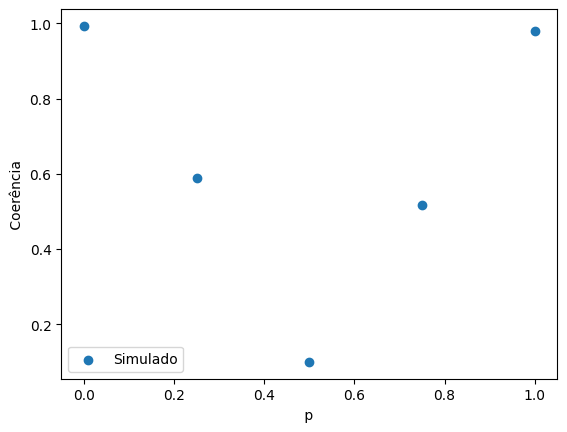

In [1]:
from src.simulation import Simulate
from src.kraus_maps import QuantumChannels as QCH
from src.theoric_channels import TheoricMaps as TM

from sympy import pi
import numpy as np
#----------------------------------------------------------------------------------------
# escolha um estado-------------------

#rho_AB = QCH.rho_AB_bpf
#rho_AB = QCH.rho_AB_bf(pi/2, 0, 0.5)
#rho_AB = QCH.rho_AB_pf(pi/2, 0, 0.5)
#rho_AB = QCH.rho_AB_pd(pi/2, 0, 0.5)
#rho_AB = QCH.rho_AB_ad(pi/2, 0, 0. 5)
#rho_AB = QCH.rho_AB_adg(pi/2, 0, 0. 5)
rho_AB = QCH.rho_AB_d(pi/2, 0, 0. 5)
#rho_AB = QCH.rho_AB_l(pi/2, 0, 0. 5)
#rho_AB = QCH.rho_AB_H(pi/2, 0, 0. 5)
#rho_AB = QCH.rho_AB_ad3(pi/2, 0, 0. 5)

#rho_AB = QCH.rho_AB_d(pi/2, 0, 0.5)
#----------------------------------------------------------------------------------------
plot_theoric = TM.theoric_rho_A_bpf
#plot_theoric = TM.theoric_rho_A_bf
#plot_theoric = TM.theoric_rho_A_pf
#plot_theoric = TM.theoric_rho_A_pd
#plot_theoric = TM.theoric_rho_A_ad
#plot_theoric = TM.theoric_rho_A_adg
#plot_theoric = TM.theoric_rho_A_d
#plot_theoric = TM.theoric_rho_A_l
#plot_theoric = TM.theoric_rho_A_H
#plot_theoric = TM.theoric_rho_A_ad3




n_qubits = 2
list_p = np.linspace(0,1,5)
epochs = 35
step_to_start = 85

S = Simulate('bpf/ClassTest', n_qubits, list_p, epochs, step_to_start, rho_AB, plot_theoric)

S.run_calcs()

In [ ]:
from src.simulation import Simulate
from src.kraus_maps import QuantumChannels as QCH
from src.theoric_channels import TheoricMaps as TM

from sympy import pi
import numpy as np
#----------------------------------------------------------------------------------------
# escolha um estado-------------------

rho_AB = QCH.rho_AB_bf
#rho_AB = QCH.rho_AB_pf(pi/2, 0, 0.5)
#rho_AB = QCH.rho_AB_pd(pi/2, 0, 0.5)
#rho_AB = QCH.rho_AB_ad(pi/2, 0, 0. 5)
#rho_AB = QCH.rho_AB_adg(pi/2, 0, 0. 5)
#rho_AB = QCH.rho_AB_d(pi/2, 0, 0. 5)
#rho_AB = QCH.rho_AB_l(pi/2, 0, 0. 5)
#rho_AB = QCH.rho_AB_H(pi/2, 0, 0. 5)
#rho_AB = QCH.rho_AB_ad3(pi/2, 0, 0. 5)

#rho_AB = QCH.rho_AB_d(pi/2, 0, 0.5)
#----------------------------------------------------------------------------------------
plot_theoric = TM.theoric_rho_A_bf
#plot_theoric = TM.theoric_rho_A_pf
#plot_theoric = TM.theoric_rho_A_pd
#plot_theoric = TM.theoric_rho_A_ad
#plot_theoric = TM.theoric_rho_A_adg
#plot_theoric = TM.theoric_rho_A_d
#plot_theoric = TM.theoric_rho_A_l
#plot_theoric = TM.theoric_rho_A_H
#plot_theoric = TM.theoric_rho_A_ad3




n_qubits = 2
list_p = np.linspace(0,1,21)
epochs = 120
step_to_start = 85

S = Simulate('bf/ClassTest', n_qubits, list_p, epochs, step_to_start, rho_AB, plot_theoric)

S.run_calcs()

TypeError: QuantumChannels.rho_AB_bf() missing 3 required positional arguments: 'theta', 'phi', and 'p'

In [ ]:
from src.simulation import Simulate
from src.kraus_maps import QuantumChannels as QCH
from src.theoric_channels import TheoricMaps as TM

from sympy import pi
import numpy as np
#----------------------------------------------------------------------------------------
# escolha um estado-------------------

rho_AB = QCH.rho_AB_pf
#rho_AB = QCH.rho_AB_pd(pi/2, 0, 0.5)
#rho_AB = QCH.rho_AB_ad(pi/2, 0, 0. 5)
#rho_AB = QCH.rho_AB_adg(pi/2, 0, 0. 5)
#rho_AB = QCH.rho_AB_d(pi/2, 0, 0. 5)
#rho_AB = QCH.rho_AB_l(pi/2, 0, 0. 5)
#rho_AB = QCH.rho_AB_H(pi/2, 0, 0. 5)
#rho_AB = QCH.rho_AB_ad3(pi/2, 0, 0. 5)

#rho_AB = QCH.rho_AB_d(pi/2, 0, 0.5)
#----------------------------------------------------------------------------------------
plot_theoric = TM.theoric_rho_A_pf
#plot_theoric = TM.theoric_rho_A_pd
#plot_theoric = TM.theoric_rho_A_ad
#plot_theoric = TM.theoric_rho_A_adg
#plot_theoric = TM.theoric_rho_A_d
#plot_theoric = TM.theoric_rho_A_l
#plot_theoric = TM.theoric_rho_A_H
#plot_theoric = TM.theoric_rho_A_ad3




n_qubits = 2
list_p = np.linspace(0,1,21)
epochs = 120
step_to_start = 85

S = Simulate('pf/ClassTest', n_qubits, list_p, epochs, step_to_start, rho_AB, plot_theoric)

S.run_calcs()

In [ ]:
from src.simulation import Simulate
from src.kraus_maps import QuantumChannels as QCH
from src.theoric_channels import TheoricMaps as TM

from sympy import pi
import numpy as np
#----------------------------------------------------------------------------------------
# escolha um estado-------------------

rho_AB = QCH.rho_AB_pd
#rho_AB = QCH.rho_AB_ad(pi/2, 0, 0. 5)
#rho_AB = QCH.rho_AB_adg(pi/2, 0, 0. 5)
#rho_AB = QCH.rho_AB_d(pi/2, 0, 0. 5)
#rho_AB = QCH.rho_AB_l(pi/2, 0, 0. 5)
#rho_AB = QCH.rho_AB_H(pi/2, 0, 0. 5)
#rho_AB = QCH.rho_AB_ad3(pi/2, 0, 0. 5)

#rho_AB = QCH.rho_AB_d(pi/2, 0, 0.5)
#----------------------------------------------------------------------------------------
plot_theoric = TM.theoric_rho_A_pf




n_qubits = 2
list_p = np.linspace(0,1,21)
epochs = 120
step_to_start = 85

S = Simulate('pd/ClassTest', n_qubits, list_p, epochs, step_to_start, rho_AB, plot_theoric)

S.run_calcs()

In [ ]:
from src.simulation import Simulate
from src.kraus_maps import QuantumChannels as QCH
from src.theoric_channels import TheoricMaps as TM

from sympy import pi
import numpy as np
#----------------------------------------------------------------------------------------
# escolha um estado-------------------

rho_AB = QCH.rho_AB_ad
#rho_AB = QCH.rho_AB_adg(pi/2, 0, 0. 5)
#rho_AB = QCH.rho_AB_d(pi/2, 0, 0. 5)
#rho_AB = QCH.rho_AB_l(pi/2, 0, 0. 5)
#rho_AB = QCH.rho_AB_H(pi/2, 0, 0. 5)
#rho_AB = QCH.rho_AB_ad3(pi/2, 0, 0. 5)

#rho_AB = QCH.rho_AB_d(pi/2, 0, 0.5)
#----------------------------------------------------------------------------------------
plot_theoric = TM.theoric_rho_A_pf




n_qubits = 2
list_p = np.linspace(0,1,21)
epochs = 120
step_to_start = 85

S = Simulate('ad/ClassTest', n_qubits, list_p, epochs, step_to_start, rho_AB, plot_theoric)

S.run_calcs()